# Homework 09
## Brown University
## DATA 1010
## Fall 2020

## Problem 1

If we fit a kernelized SVM model using LIBSVM, then it produces a collection of values that can be used to compute the decision function (essential the prediction function, but just before we apply the signum function):

In [1]:
using Pkg; Pkg.activate("MLJ", shared=true)
Pkg.add("MLJ")
Pkg.add("MLJScikitLearnInterface")

In [ ]:
using MLJ, Plots

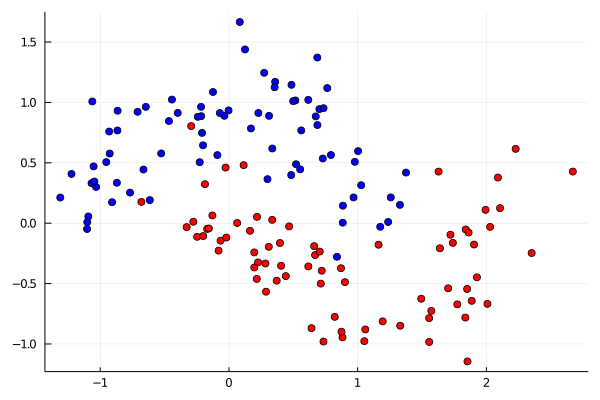

In [2]:
using Random; Random.seed!(123)
X, y = make_moons(noise = 1/4)
scatter(X.x1, X.x2, group = y, color = [:blue :red], label = "")

In [3]:
model = @load SVMClassifier 
model.kernel = "rbf"
svm = machine(model, X, y)
fit!(svm)

┌ Info: Training Machine{SVMClassifier} @850.
└ @ MLJBase /Users/sswatson/.julia/packages/MLJBase/xg2Ti/src/machines.jl:319


Machine{SVMClassifier} @850 trained 1 time.
  args: 
    1:	Source @381 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @871 ⏎ `AbstractArray{Multiclass{2},1}`


In [4]:
fitted_params(svm)

(support = Int32[2, 6, 10, 18, 24, 32, 37, 59, 65, 69  …  82, 85, 90, 92, 106, 108, 115, 120, 134, 142],
 support_vectors = [0.9679662443386359 0.21316034798019454; 1.1753292998862204 -0.029570823174558197; … ; 0.1140784147074945 0.4805126880918868; -0.12872753028420852 0.06392688842753766],
 n_support = Int32[24, 25],
 dual_coef = [-1.0 -1.0 … 1.0 1.0],
 coef = nothing,
 intercept = [0.0902642044359604],
 fit_status = 0,
 classes = UInt32[0x00000001, 0x00000002],)

The `dual_coef` values correspond to what we're calling $\eta$ in the math notation. However, note that only the nonzero $\eta$ values are stored! To see which ones are nonzero, look at `support`. The `support_vectors` are also included, for your convenience. What we've been calling $\alpha$ corresponds to `intercept`.

Write some code which uses these values to compute the decision function (that is, from scratch, not using `_decision_function` as we did in class), and use it to plot a heatmap of the decision function. You might have to include the radial basis function manually, since that's actually hard-coded in LIBSVM.

Notes:  
(1) the course cheatsheet describes the prediction function exactly.  
(2) the knowledge you gain in this question is not Julia-specific; LIBSVM is the main library underlying SVM packages in various dynamic languages.

## Problem 2

Apply the Lagrange duality method we apply in Data Gymnasia to obtain the dual SVM to the problem of minimizing the objective function $f(x,y) = x^2 + y^2$ subject to the constraint $x + y \ge 5$. Show that strong duality holds (that is, we get the same value for the objective function if we swap min and max).

Note: this problem is asking you to walk through the same steps: introducing the function $H$, swapping min/max, etc. The only difference is that you're dealing with a much simpler optimization problem.

## Problem 3

Let's take a look at the zeros and ones in the MNIST dataset:

In [ ]:
Pkg.add("MLDatasets")
using MLDatasets

In [5]:
function load_MNIST_zeros_and_ones()
    features, labels = MNIST.traindata()
    features = reshape(features[:, :, labels .∈ Ref((0, 1))], (28^2, :))
    labels = labels[labels .∈ Ref((0,1))];
    float(features), labels
end

load_MNIST_zeros_and_ones (generic function with 1 method)

In [6]:
features, labels = load_MNIST_zeros_and_ones()

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

Each column of `features` stores the pixel intensities for a 28 by 28 image:

In [7]:
size(features)

(784, 12665)

We can see these images by reshaping each column back into a 28 by 28 image and converting the intensity to an actual color value: 

In [8]:
hcat([Gray.(reshape(features[:, k], 28, 28)') for k in 1:10]...)

Would you guess that there exists a hyperplane in the 784-dimensional space in which the digits live which perfectly separates all the zeros from the ones?

Make a conjecture first and then figure out the truth computationally.